# **Contexto**

Imagine que es un investigador médico que recopila datos para un estudio. Ha recopilado datos sobre un conjunto de pacientes, todos los cuales padecían la misma enfermedad. Durante el curso de su tratamiento, cada paciente respondió a uno de los 5 medicamentos, medicamento A, B, C, X e Y.

Parte de su trabajo consiste en crear un modelo para descubrir qué fármaco podría ser apropiado para un futuro paciente con la misma enfermedad. Las características de este conjunto de datos son la edad, el sexo, la presión arterial y el colesterol de los pacientes, y el objetivo es el fármaco al que respondió cada paciente.

Es una muestra de clasificador multiclase. Se puede usar el conjunto de datos para construir un árbol de decisiones y luego usarlo para predecir la clase de un paciente desconocido o para recetar un medicamento a un paciente nuevo.

Fuente de datos: IBM

# **Imports**

**Importamos las librerías necesarias**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Set Seed**

**Seteamos la** *seed* **a un valor fijo para que el código siempre sea consistente**

In [2]:
np.random.seed(100)

# **Pre-Procesamiento de datos**

**Cargamos el dataset a un DataFrame de pandas**

In [3]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
print(f"total de datos: {len(df)}")

total de datos: 200


**Transformar variables categóricas a númericas**

In [5]:
sex_dict = {'F': 0, 'M': 1}
bp_dict = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
ch_dict = {'NORMAL': 0, 'HIGH': 1}

df = df.replace({'Sex': sex_dict, 'BP': bp_dict, 'Cholesterol': ch_dict})
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


# **Construir matrices X y vectores y**

**Separar matriz X y vector y**

In [7]:
features = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
target = "Drug"

In [8]:
X = df[features]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [9]:
y = df[target]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

**Separar matriz X y vector y en sets de train, test y validate (80/10/10)**

In [10]:
X_train, X_testvalid, y_train, y_testvalid = train_test_split(X, y, test_size=0.2, random_state=3)
X_validate, X_test, y_validate, y_test = train_test_split(X_testvalid, y_testvalid, test_size=0.5, random_state=3)

In [11]:
print(f"Cantidad train: {len(X_train)}\nCantidad test: {len(X_test)}\nCantidad validate: {len(X_validate)}")

Cantidad train: 160
Cantidad test: 20
Cantidad validate: 20


# **Crear, entrenar y probar el clasificador**

**Ejemplo de un DecisionTree**

In [12]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)

**Estudio de hiperparámetros con set de validación**

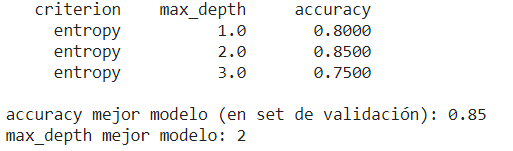

In [13]:
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Graficamos el arbol usando plot_tree de SKlearn**

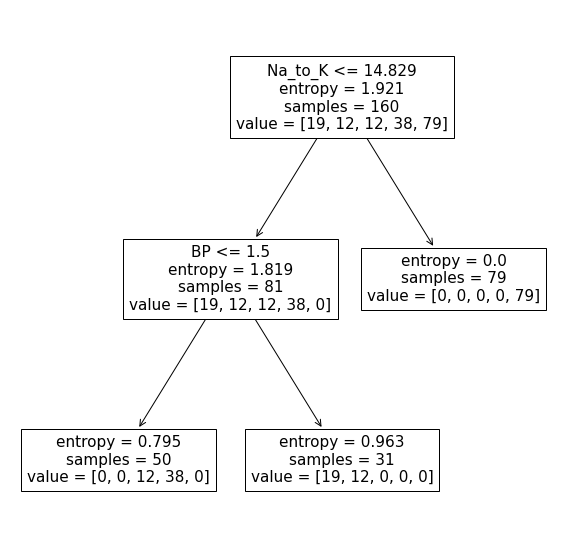

In [14]:
plt.figure(figsize=(10,10))
plot_tree(best_tree, feature_names=features)
plt.show()

**Significado de "value"**

In [15]:
best_tree.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

**Probamos el mejor modelo con el set de test**

In [16]:
y_pred = best_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.75

**Matriz de Confusión**

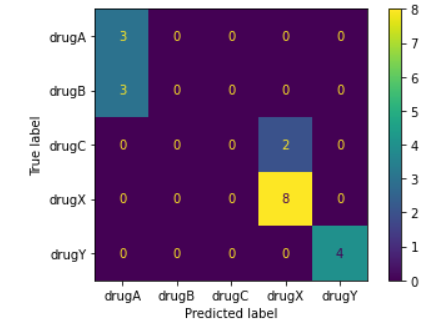

# **Nota**

En realidad el mejor árbol tiene max_depth 5, aunque esto no significa que siempre al aumentar la profundidad mejore el clasificador

In [17]:
ultimate_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
ultimate_tree.fit(X_train, y_train)
y_pred = ultimate_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

1.0

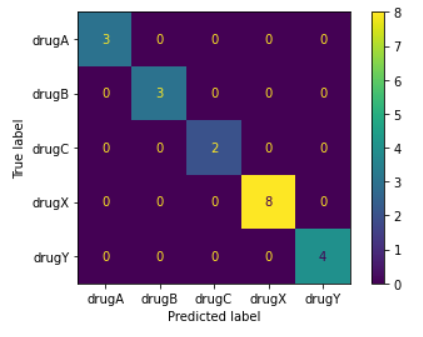

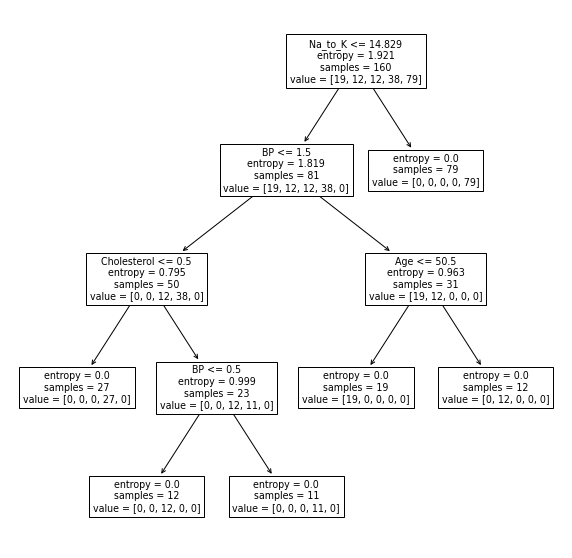

In [18]:
plt.figure(figsize=(10,10))
plot_tree(ultimate_tree, feature_names=features)
plt.show()